In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
disits = load_digits() # 1,979개의 이미지 데이터 로드

In [20]:
# 첫 번째 샘플  : 샘플이 8x8행렬
print(disits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [21]:
print(disits.target[0])

0


In [22]:
print('전체 샘플의 수 : {}'.format(len(disits.images)))

전체 샘플의 수 : 1797


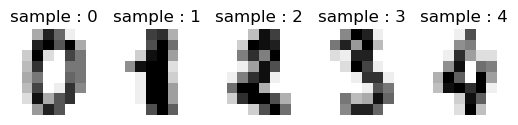

In [23]:
#전체 샘플중에서 상위 5개의 샘플만 시각화
images_and_labels = list(zip(disits.images, disits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2,5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample : %i' % label)

In [24]:
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블 : ', disits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


훈련 데이터와 레이블을 각각 X,Y에 저장 disits.data를 상용 이는 8 x 8 행렬을 전부 64차원의 벡터로 변화해서 저장한 상태

In [25]:
print(disits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [26]:
x = disits.data  # 이미지 즉, 특성행렬
y = disits.target  # 각 이미지에 대한 레이블

다층 퍼셉트론 분류기 만들기

In [27]:
import torch
import torch.nn as nn
from torch import optim

In [28]:
model = nn.Sequential(
    nn.Linear(64,32),  # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32,16),  # hidden_layer1 = 32, hidden_layer2 = 16
    nn.ReLU(),
    nn.Linear(16,10)  # hidden_layer2 = 16, output_layer = 10
)

In [29]:
X = torch.tensor(x, dtype=torch.float)
Y = torch.tensor(y, dtype=torch.int64)

In [30]:
loss_fn = nn.CrossEntropyLoss() # 이 비용함수는 소프트맥스 함수 포함하고 있음

In [31]:
optimizer = optim.Adam(model.parameters())

In [32]:
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) #forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0 :
        print('Epoch{:4d}/{}  Cost : {:.4f}'.format(epoch,100,loss.item()))
    losses.append(loss.item())
            

Epoch   0/100  Cost : 2.4892
Epoch  10/100  Cost : 2.0572
Epoch  20/100  Cost : 1.7353
Epoch  30/100  Cost : 1.3744
Epoch  40/100  Cost : 0.9805
Epoch  50/100  Cost : 0.6486
Epoch  60/100  Cost : 0.4343
Epoch  70/100  Cost : 0.3098
Epoch  80/100  Cost : 0.2372
Epoch  90/100  Cost : 0.1920


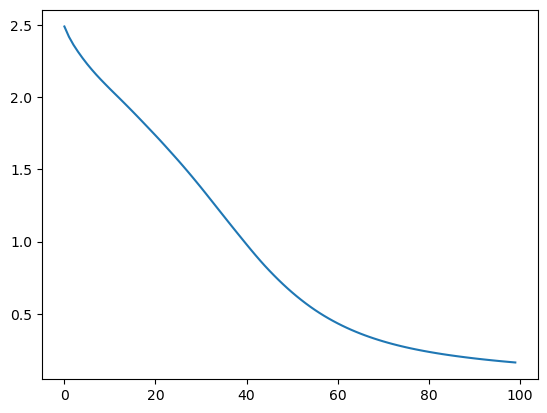

In [33]:
plt.plot(losses)